In [1]:
import json
import pandas as pd
import numpy as np

df = pd.read_csv("./data/stars_final.csv",index_col=0)
print(df.columns)
df = df[[
    "id","name","full_name","private","html_url",
    "starred_at",
    "created_at","updated_at", "pushed_at","homepage",
    "size","stargazers_count","watchers_count","language","forks_count",
    "description","topics","visibility","forks","watchers",]]
df.head()

Index(['id', 'node_id', 'name', 'full_name', 'private', 'html_url',
       'description', 'fork', 'url', 'forks_url',
       ...
       'license.spdx_id', 'license.url', 'license.node_id',
       'permissions.admin', 'permissions.maintain', 'permissions.push',
       'permissions.triage', 'permissions.pull', 'license', 'starred_at'],
      dtype='object', length=107)


,id,name,full_name,private,html_url,starred_at,created_at,updated_at,pushed_at,homepage,size,stargazers_count,watchers_count,language,forks_count,description,topics,visibility,forks,watchers
0,365005377,btop,aristocratos/btop,False,https://github.com/aristocratos/btop,2023-07-10 08:36:16+00:00,2021-05-06T18:40:21Z,2023-07-10T13:14:49Z,2023-07-05T11:23:29Z,NaN,8343,12279,12279,C++,398,A monitor of resources,[],public,398,12279
1,401561230,challenge100-codingtest-study,ellynhan/challenge100-codingtest-study,False,https://github.com/ellynhan/challenge100-codin...,2023-07-10 06:38:43+00:00,2021-08-31T03:30:36Z,2023-07-10T06:38:43Z,2023-07-10T02:33:08Z,NaN,6224,126,126,C++,87,누구나 참여 가능한 알고리즘 코딩테스트 문제풀이 스터디 - 깃헙 잔디 채워봅시다!,"['algorithms-and-data-structures', 'codingtest...",public,87,126
2,320135333,aws-mysql-jdbc,awslabs/aws-mysql-jdbc,False,https://github.com/awslabs/aws-mysql-jdbc,2023-07-09 02:57:22+00:00,2020-12-10T02:21:58Z,2023-07-09T02:57:23Z,2023-07-08T01:38:12Z,https://awslabs.github.io/aws-mysql-jdbc/,6805,186,186,Java,46,The Amazon Web Services (AWS) JDBC Driver for ...,"['aws-jdbc-driver', 'java', 'jdbc', 'mysql', '...",public,46,186
3,13404515,HikariCP,brettwooldridge/HikariCP,False,https://github.com/brettwooldridge/HikariCP,2023-07-09 02:17:05+00:00,2013-10-08T05:43:03Z,2023-07-10T02:25:43Z,2023-07-07T10:10:53Z,NaN,4649,18408,18408,Java,2776,"光 HikariCP・A solid, high-performance, JDBC con...","['connection-pool', 'high-performance', 'java'...",public,2776,18408
4,323968067,Number_Theory_in_CP_PS,rkm0959/Number_Theory_in_CP_PS,False,https://github.com/rkm0959/Number_Theory_in_CP_PS,2023-07-08 11:51:58+00:00,2020-12-23T17:52:55Z,2023-07-08T11:51:58Z,2021-03-29T04:34:29Z,NaN,87,142,142,C++,4,"CP, PS 정수론을 위한 가이드","['competitive-programming', 'number-theory']",public,4,142


In [2]:
# df.sort_values(by="updated_at", ascending=False).head(20)

In [3]:
# all_topics = set(df["topics"].explode().to_list())
# print(all_topics)



## Graph by Starred chronological order 

In [4]:
df.topics = [eval(a) for a in df.topics.array]
print(df)

all_topics = []
for arr in df["topics"]:
    all_topics.extend(arr)
topics = set(all_topics)
print(len(all_topics), len(topics))

topics_cnt = [(t, all_topics.count(t)) for t in topics]
topics_cnt = (pd.DataFrame(topics_cnt, columns=["topic","count"])
                .sort_values(by="count", ascending=False))
topics_cnt = topics_cnt.loc[topics_cnt["count"]>=10]
# topics_cnt.loc[topics_cnt["count"]<20,"topic"] = "misc"
topics_cnt


           id                           name   
0   365005377                           btop  \
1   401561230  challenge100-codingtest-study   
2   320135333                 aws-mysql-jdbc   
3    13404515                       HikariCP   
4   323968067         Number_Theory_in_CP_PS   
..        ...                            ...   
26    6698053                        vimwiki   
27   28457823                   freeCodeCamp   
28   21052985              battery-historian   
29    9625333                   vim-startify   
30   14021271                   vim-markdown   

                                 full_name  private   
0                        aristocratos/btop    False  \
1   ellynhan/challenge100-codingtest-study    False   
2                   awslabs/aws-mysql-jdbc    False   
3                 brettwooldridge/HikariCP    False   
4           rkm0959/Number_Theory_in_CP_PS    False   
..                                     ...      ...   
26                         vimwiki/vim

,topic,count
1281,python,58
1005,hacktoberfest,36
1140,machine-learning,24
1541,linux,23
296,awesome,22
900,terminal,20
1328,cli,20
51,awesome-list,17
771,deep-learning,16
1567,vim,16


In [5]:
import plotly.express as px
topics_cnt_np = np.array(topics_cnt).T

fig = px.pie(topics, title="Distribution by popular tags",
              names=topics_cnt_np[0], values=topics_cnt_np[1])
fig.show()

## Visualize Numerical data

In [6]:
import matplotlib.pyplot as plt

num_df = df[["name","created_at","size","stargazers_count","forks_count"]].sort_values(by="created_at")
num_df

,name,created_at,size,stargazers_count,forks_count
44,tty-clock,2008-06-08T23:25:04Z,176,750,110
83,faker,2008-12-24T17:20:37Z,12914,10831,3124
25,oocss,2009-01-28T02:13:19Z,5287,6251,741
23,todo.txt-cli,2009-03-06T01:33:34Z,5754,5240,681
39,ranger,2009-06-04T06:41:11Z,10493,13653,849
...,...,...,...,...,...
29,hn-recommendation-api,2023-06-13T15:59:18Z,147,67,6
20,open-resume,2023-06-24T06:06:30Z,1906,3198,202
17,chathn,2023-06-25T17:39:39Z,400,779,268
7,tinyvector,2023-07-01T00:59:09Z,180,599,23


In [7]:
num_df["created_at"] = pd.to_datetime(num_df["created_at"])
num_df["created_yy"] = num_df.created_at.dt.year
num_df["created_mm"] = num_df.created_at.dt.month
num_df["created_yymm"] = num_df.created_at.apply(lambda d: str(d.year)+'-'+str(d.month))

# num_df["created_yymm"] = f'{num_df["created_yy"]}-{num_df["created_mm"]}'
num_df

,name,created_at,size,stargazers_count,forks_count,created_yy,created_mm,created_yymm
44,tty-clock,2008-06-08 23:25:04+00:00,176,750,110,2008,6,2008-6
83,faker,2008-12-24 17:20:37+00:00,12914,10831,3124,2008,12,2008-12
25,oocss,2009-01-28 02:13:19+00:00,5287,6251,741,2009,1,2009-1
23,todo.txt-cli,2009-03-06 01:33:34+00:00,5754,5240,681,2009,3,2009-3
39,ranger,2009-06-04 06:41:11+00:00,10493,13653,849,2009,6,2009-6
...,...,...,...,...,...,...,...,...
29,hn-recommendation-api,2023-06-13 15:59:18+00:00,147,67,6,2023,6,2023-6
20,open-resume,2023-06-24 06:06:30+00:00,1906,3198,202,2023,6,2023-6
17,chathn,2023-06-25 17:39:39+00:00,400,779,268,2023,6,2023-6
7,tinyvector,2023-07-01 00:59:09+00:00,180,599,23,2023,7,2023-7


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1



<AxesSubplot:xlabel='created_yy', ylabel='stargazers_count'>

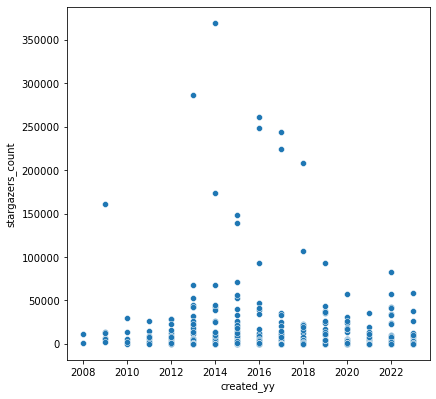

In [8]:
import seaborn as sns

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(data=num_df,
                # x="stargazers_count", y="forks_count",
                x="created_yy", y="stargazers_count",
                # hue="created_at", hue_order=df["created_at"]

                # x="created_yy", y="created_mm",
                # hue="stargazers_count", hue_order=range(0,10**6,100)
                )

## Number of starred repos over time

In [9]:
starred_dt = pd.to_datetime(df["starred_at"]).sort_values()
# first_dt, last_dt = starred_dt.iloc[0].date(), starred_dt.iloc[-1].date()
# print(first_dt, last_dt)

starred_dt = starred_dt.groupby(by=starred_dt.dt.date).count().cumsum()
starred_dt = pd.DataFrame(starred_dt)
starred_dt["dates"] = starred_dt.index
starred_dt["repos"] = starred_dt["starred_at"]

print(starred_dt)
# starred_dt.plot()

fig = px.line(starred_dt, x="dates", y="repos", title="Number of starred repos over time")
fig.show()


            starred_at       dates  repos
starred_at                               
2016-11-09           1  2016-11-09      1
2016-11-11           2  2016-11-11      2
2016-11-15           5  2016-11-15      5
2016-11-17           7  2016-11-17      7
2016-11-18           8  2016-11-18      8
...                ...         ...    ...
2023-07-05         623  2023-07-05    623
2023-07-07         626  2023-07-07    626
2023-07-08         627  2023-07-08    627
2023-07-09         629  2023-07-09    629
2023-07-10         631  2023-07-10    631

[346 rows x 3 columns]


## Top k topics

In [25]:
k = 5
top_k_topics = topics_cnt.head(k)["topic"].tolist()
print(top_k_topics)

['python', 'hacktoberfest', 'machine-learning', 'linux', 'awesome']


In [31]:
pd.get_dummies(all_topics)

,11,2022,30daysofjavascript,3b1b-videos,academic-paper,academics,actions,actions-list,ad-block,ad-blocker,...,zsh-autosuggestions,zsh-completion,zsh-completions,zsh-configuration,zsh-frameworks,zsh-plugin,zsh-plugins,zsh-prompt,zsh-theme,zshrc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2753,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2754,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2755,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
